In [1]:
##  Imports

import importlib
import sys
sys.path.append('../task')

import collections
import json
from matplotlib import pyplot as plt
import os
import cv2
import pandas as pd
import seaborn as sns

from moog_demos import gif_writer as gif_writer_lib
from moog import maze_lib
from moog import observers

from utils import common
from utils import get_trial_dataframe
from utils import get_trial_paths
from utils import trial_video

importlib.reload(common)
importlib.reload(get_trial_dataframe)
importlib.reload(get_trial_paths)
importlib.reload(trial_video)

# For matplotlib inline animations to show
%matplotlib inline

ModuleNotFoundError: No module named 'cv2'

In [4]:
##  Define behavior data path

DATA_TAIL = '2021_05_07_22_07_34'  # Nick's pilot laptop data

DATA_PATH = os.path.join(
    os.getcwd(),
    'data/',
    DATA_TAIL,
)

In [12]:
##  Load behavior data

importlib.reload(get_trial_paths)
importlib.reload(get_trial_dataframe)

trial_paths, stimulus_features = get_trial_paths.get_trial_paths(DATA_PATH)
trial_df = get_trial_dataframe.get_trial_dataframe(trial_paths, stimulus_features)

Number of trials:  48
trial_df columns: ['trial_num', 'path_length', 'name', 'num_turns', 'start_x']
Unique Values:
path_length: [ 2  3  4  6  8 10 11 12 13 15 16 17 19 20 21 22 23 24 25 26 32 34 36 38]
name: ['Random12']
num_turns: [0 1 2 3 4 5]
start_x: [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [17]:
sample_every = 3

def _write_to_gif(frames, gif_name, fps=20):
    gif_file = os.path.join(os.getcwd(), 'gifs', gif_name)
    gif_writer = gif_writer_lib.GifWriter(gif_file=gif_file + '.gif', fps=fps)
    for frame in frames:
        gif_writer.add(frame)
    gif_writer.close()
    
def _concat_frames(frames_0, frames_1):
    frames = []
    for f_0, f_1 in zip(frames_0, frames_1):
        buffer = (255 * np.ones((f_0.shape[0], 16, 3))).astype(np.uint8)
        f = np.concatenate((f_0, buffer, f_1), axis=1)
        frames.append(f)
    return frames

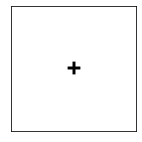

Writing gif with 47 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_0.gif


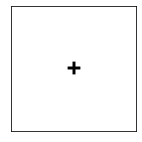

Writing gif with 60 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_1.gif


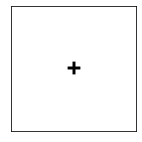

Writing gif with 75 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_2.gif


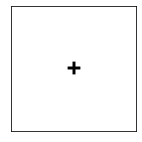

Writing gif with 53 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_3.gif


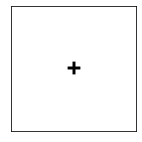

Writing gif with 31 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_4.gif


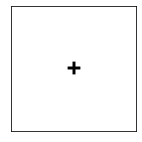

Writing gif with 54 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_5.gif


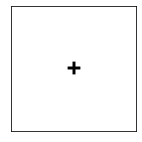

Writing gif with 69 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_6.gif


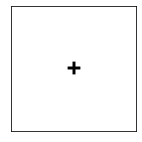

Writing gif with 75 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_7.gif


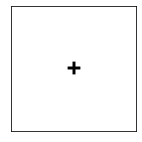

Writing gif with 56 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_8.gif


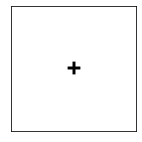

Writing gif with 55 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_9.gif


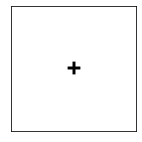

Writing gif with 57 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_10.gif


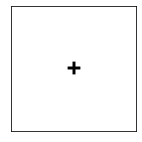

Writing gif with 42 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_11.gif


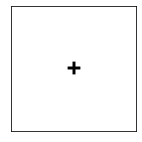

Writing gif with 31 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_12.gif


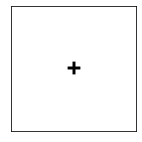

Writing gif with 53 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_13.gif


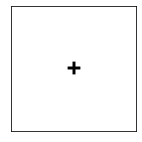

Writing gif with 66 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_14.gif


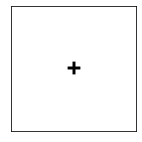

Writing gif with 54 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_15.gif


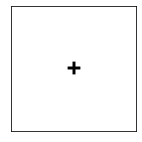

Writing gif with 47 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_16.gif


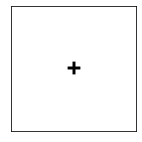

Writing gif with 66 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_17.gif


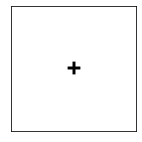

Writing gif with 65 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_18.gif


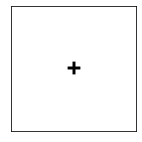

Writing gif with 44 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_19.gif


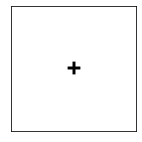

Writing gif with 58 images to file /Users/nicholaswatters/Desktop/grad_school/research/mehrdad/maze_set_go/behavior_analysis/gifs/examples/demo_20.gif


In [21]:
gif_name_ = 'examples/demo'

importlib.reload(trial_video)
importlib.reload(common)

for i, trial_num in enumerate(trial_df['trial_num']):
    if i > 20:
        continue
    frames_opaque, _ = trial_video.get_frames(
        trial_paths[trial_num],
        sample_every,
        translucent_prey=False,
        include_fixation=True)
    
    frames_translucent, eye_pos = trial_video.get_frames(
        trial_paths[trial_num],
        sample_every,
        translucent_prey=True,
        include_fixation=True)

    frames_t = trial_video.display_video(frames_translucent, eye_pos=eye_pos)
    frames_t = [
        cv2.resize(x, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)[:, :, :3]
        for x in frames_t
    ]
    
    frames = _concat_frames(frames_opaque, frames_t)
    
    gif_name = gif_name_ + '_' + str(trial_num)
    _write_to_gif(frames, gif_name)
    